
# Quantum Walk

A quantum walk is the quantum analog of a classical random walk. It is a process that describes the evolution of a quantum particle on a graph or lattice. Quantum walks have been used to develop quantum algorithms, demonstrating quantum speedup over classical algorithms for various computational problems.

### Objective:
The goal of this quantum program is to simulate a quantum random walk on a line topology with 16 nodes. In a line topology, the nodes are arranged sequentially, and each node is connected to its immediate neighbors. For example, consider a line of 16 nodes numbered from 0 to 15.

The algorithm includes two important steps:

Coin Operator: determines the walker's movement probabilities

Shift Operator: execute actual movement

# Linear Graph with 16 nodes

Setting Number of qubits to 4, as, $log_{2}{16} = 4$

The coin operator, analogous to flipping a coin in quantum mechanics, determines the probabilities of the walker's movements. We, then, use diffuser oracle to to amplify the probabilities of adjacent nodes.

In [6]:
from classiq import *

size = 4

@qfunc
def prepare_minus(x: QBit):
    """
    Prepares a qubit in the |-> state.
    
    Args:
        x (QBit): The qubit to prepare.
    """
    X(x)
    H(x)

@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
    """
    Prepares a qubit in the |-> state.
    
    Args:
        x (QBit): The qubit to prepare.
    """
    aux^=(x!=0)

@qfunc
def zero_diffuzer(x: QNum):
    """
    Implements the zero diffuser for the quantum walk.
    
    Args:
        x (QNum): QNum representing the current node.
    """
    aux = QNum('aux')
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)

# W Operator

The superposition of all the adjacent vertices for all the vertices in the linear graph is created by this function. The first and the last vertex has only one adjacent verex compared to all other vertices, so the for loop is customized accordingly for these two vertices.

In [7]:
def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    """
    Defines the coin operation for the quantum walk.
    
    Args:
        i (int): Current node index.
        vertices (QNum): QNum representing the vertices.
        adjacent_vertices (QNum): QNum representing the adjacent vertices.
    """
    prob = [0]* 2**size
    if i==0:
        prob[i+1] = 1.0 #Probability
    elif i==((2**size)-1):
        prob[i-1] = 1.0 #Probability
    else:
        prob[i-1] = 0.5 #Probability
        prob[i+1] = 0.5 #Probability
    print(f'State={i}, prob vec ={prob}')

    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))

@qfunc
def W_operator(vertices:QNum, adjacent_vertices: QNum):
    """
    Applies the coin operator to all vertices.
    
    Args:
        vertices (QNum): QNum representing the vertices.
        adjacent_vertices (QNum): QNum representing the adjacent vertices.
    """
    for i in range(2**size):
        W_iteration(i,vertices,adjacent_vertices)

# S Operator

Here, the qubit should result in a 1 state for the edges of two adjacent vertices, so the edge oracle is changed accordingly.

In [3]:
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices-adjacent_vertices) == 1) | ((vertices-adjacent_vertices) == -1))

@qfunc
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
    repeat(count= x.len,
        iteration= lambda i: SWAP(x[i],y[i]))

@qfunc
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

# Main Function

The process starts by placing the walker in a superposition of all possible positions along the line. This is usually done with quantum gates like the Hadamard gate, which gives the walker an equal probability amplitude at any of the 16 nodes. Mathematically, the walker's initial state is a superposition of basis states ∣0⟩, ∣1⟩,..., ∣15⟩, with each basis state corresponding to a specific node.

In [4]:
@qfunc
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    '''function'''

    allocate(size,vertices)
    hadamard_transform(vertices)
    allocate(size,adjacent_vertices)

    W_operator(vertices,adjacent_vertices)
    S_operator(vertices,adjacent_vertices)

qmod = create_model(main)

State=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0

In [5]:
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/8c6fde58-f764-4703-933b-ebaeddc6a4ee?version=0.43.3


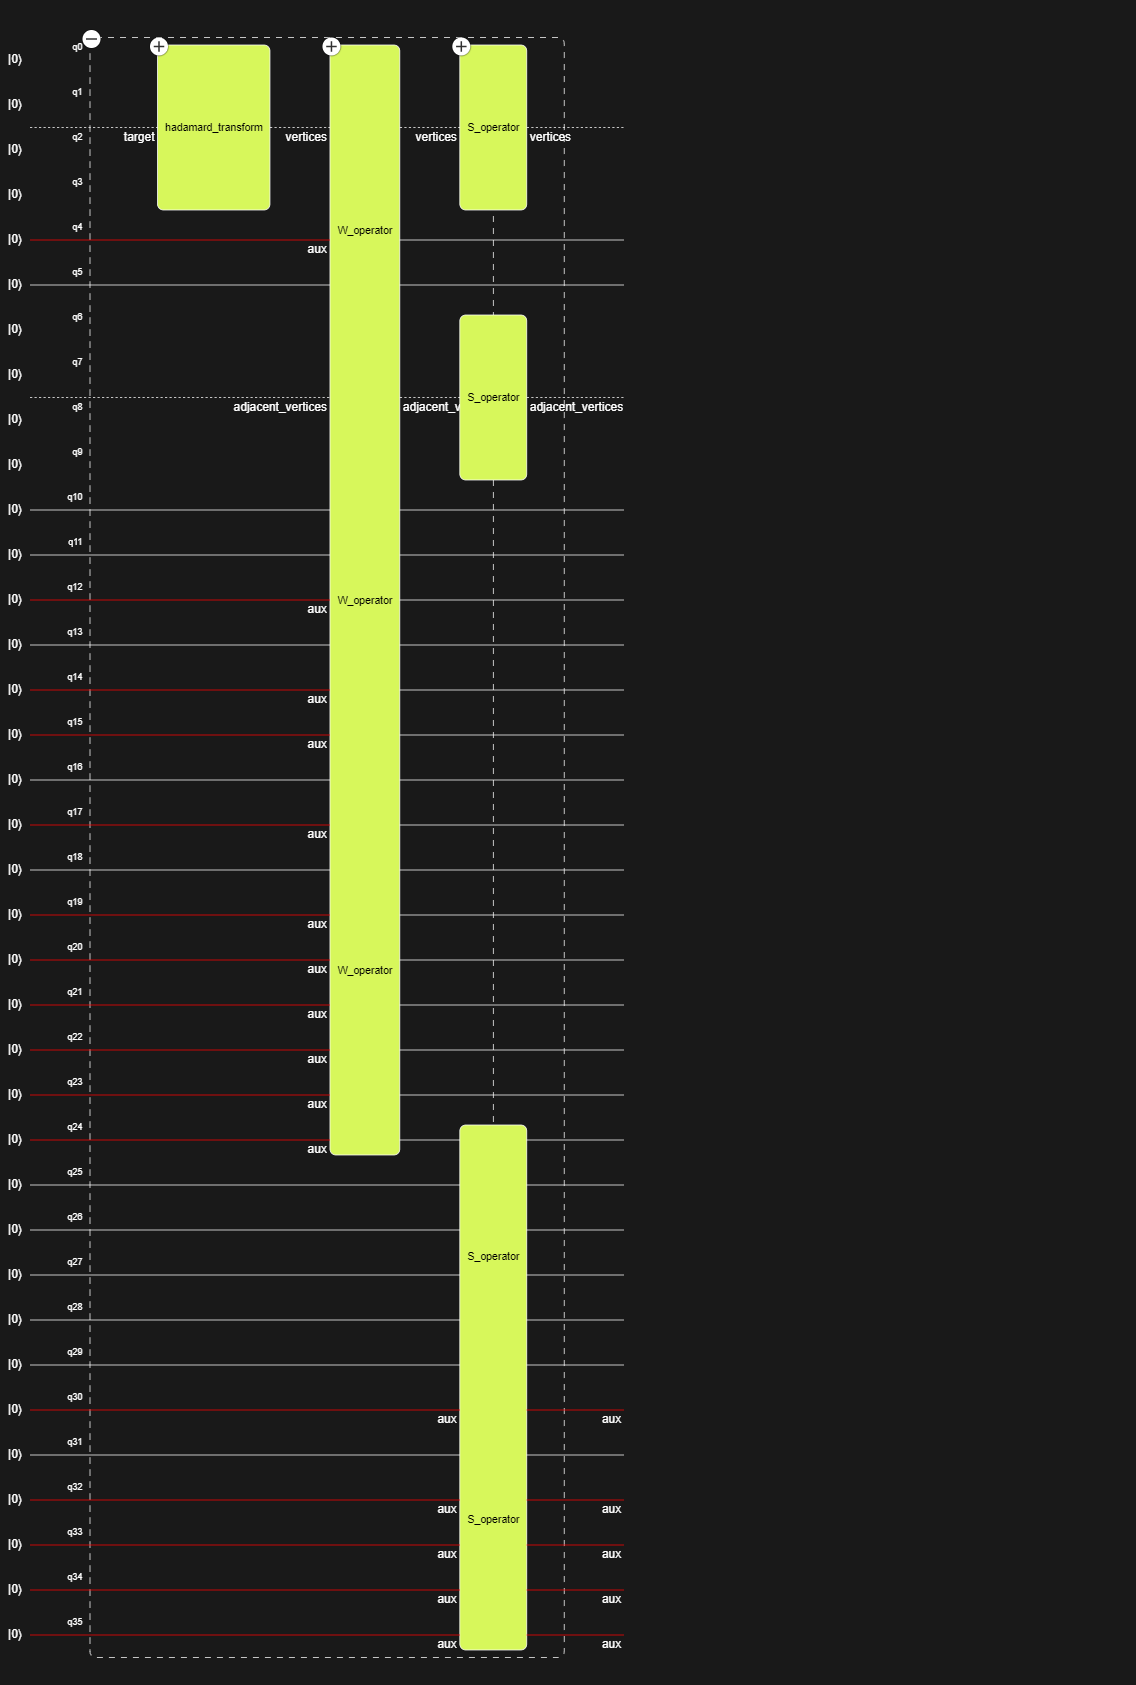